In [115]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sb


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [153]:
!pip install plotly

     |████████████████████████████████| 7.3MB 4.0MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11429 sha256=c7b8bd1bce1455d2dd61723d3ad619051a13488a5a61166a565ddcf3e2ae0a67
  Stored in directory: /Users/armandomejiagarces/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


# Clasificacón de velas
Este archivo va a tener el objetivo de identificar los patrones de velas japonesas. La idea de esto es lograr ver los cluster de las velas y cómo se comportan. 

De esa manera, primero vamos a hacer la clasificacón por vela (es decir high, close, low, open), luego vamos a hacer la clasificación con respecto a a velas pasadas es decir el cambio del close en t y close en t-1 y gaps (close en t-1 y open en t). Por último, vamos a hacer un algoritmo que clasifique patrones de múltiples velas 

Todo se va a referenciar con respecto al open, de tal manera que se puedan hacer las comparaciones. Los algorítmos de clasificación que se van a usar son K-means, DBSCAN y .

# Importar datos

In [100]:
datos=pd.read_csv("symmetry_Hist_Rates.csv")
datos.tail()

,DATE,ASSET,UNDERLYING,OPEN,HIGH,LOW,CLOSE,SETTLE
53775,43838,USD/TRY,USD/TRY,5.9722,5.9879,5.9020,5.9082,5.9082
53776,43839,USD/TRY,USD/TRY,5.9082,5.9263,5.8568,5.8745,5.8745
53777,43840,USD/TRY,USD/TRY,5.8745,5.8966,5.8614,5.8808,5.8808
53778,43843,USD/TRY,USD/TRY,5.8780,5.8877,5.8536,5.8675,5.8675
53779,43844,USD/TRY,USD/TRY,5.8675,5.9014,5.8625,5.8815,5.8815


In [101]:
cop=datos[datos["ASSET"]=="USD/COP"][datos.columns[3:]]

In [102]:
cop

,OPEN,HIGH,LOW,CLOSE,SETTLE
16915,2252.50,2254.00,2227.10,2232.50,2243.59
16916,2226.00,2234.85,2219.10,2224.35,2234.81
16917,2212.00,2212.10,2190.00,2191.50,2227.24
16918,2194.00,2230.60,2189.50,2213.00,2197.72
16919,2225.00,2238.00,2205.50,2209.30,2214.13
...,...,...,...,...,...
19527,3265.10,3266.80,3239.00,3247.00,3264.26
19528,3251.95,3264.40,3241.75,3256.90,3254.42
19529,3254.10,3289.99,3251.00,3270.70,3253.89
19530,3278.00,3298.80,3270.00,3270.75,3272.62


# Cosntruir archivo para clasificar

Ahora construimos el archivo para clasificar

In [104]:
prueba=pd.DataFrame(index=cop.index)
for i in cop.columns[1:4]:
    prueba[i]=(cop[i]/cop[cop.columns[0]]-1)*100

In [105]:
#prueba["change"]=(cop["CLOSE"]/cop["CLOSE"].shift(1)-1)*100
#prueba=

In [106]:
prueba.head()

,HIGH,LOW,CLOSE
16915,0.066593,-1.127636,-0.887902
16916,0.397574,-0.309973,-0.074124
16917,0.004521,-0.994575,-0.926763
16918,1.668186,-0.205105,0.865998
16919,0.584270,-0.876404,-0.705618


/Users/armandomejiagarces/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


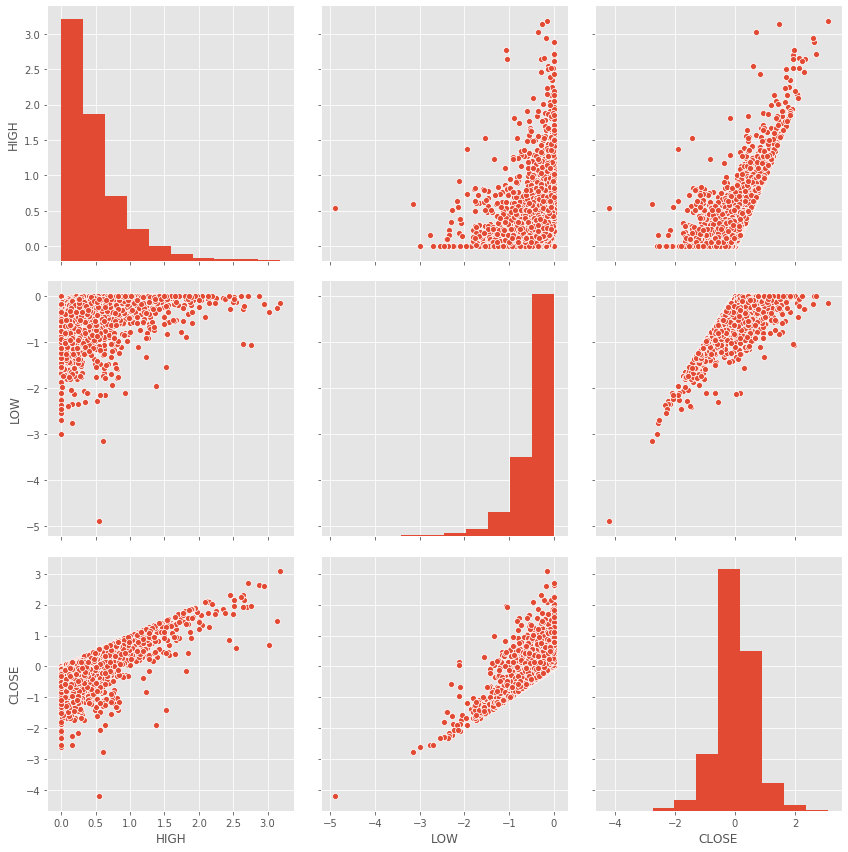

In [123]:
sb.pairplot(prueba.dropna(),size=4,vars=[prueba.columns[0],prueba.columns[1],prueba.columns[2]],kind='scatter')

# Pre procesar datos para aplicar algorítmo de clasificación

In [124]:
# ---------------------- arreglar los datos escalandolos con el caso estandar -------------------------
X = preprocessing.StandardScaler().fit_transform(prueba) # Z=(x-u)/sigma
print (X.shape)

(2617, 3)


Vamos a analizar el punto de codo del algorítmo 

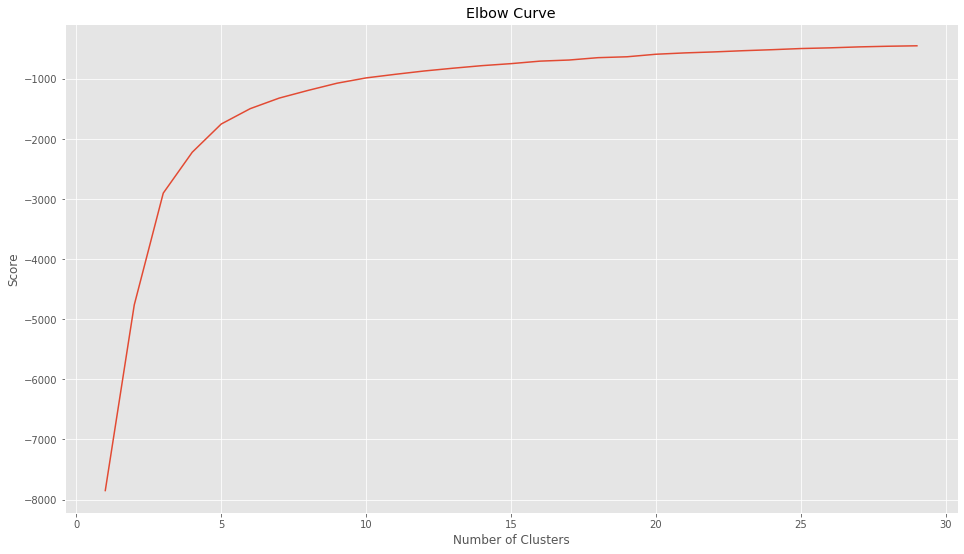

In [125]:
Nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


# K means

Corremos el algorítmo

In [126]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.44386817  0.52607909  0.61108289]
 [-0.39036004 -3.46973292 -2.51198044]
 [-0.62740917 -0.33446119 -0.51934403]
 [ 3.99259568  0.57311687  2.76932538]
 [ 1.69432219  0.54433958  1.37678595]
 [-0.60087078 -1.46459117 -1.2815799 ]
 [-0.42757964  0.5181982   0.012312  ]]


In [134]:
labels = kmeans.predict(X)
labels

array([5, 6, 5, ..., 4, 6, 0], dtype=int32)

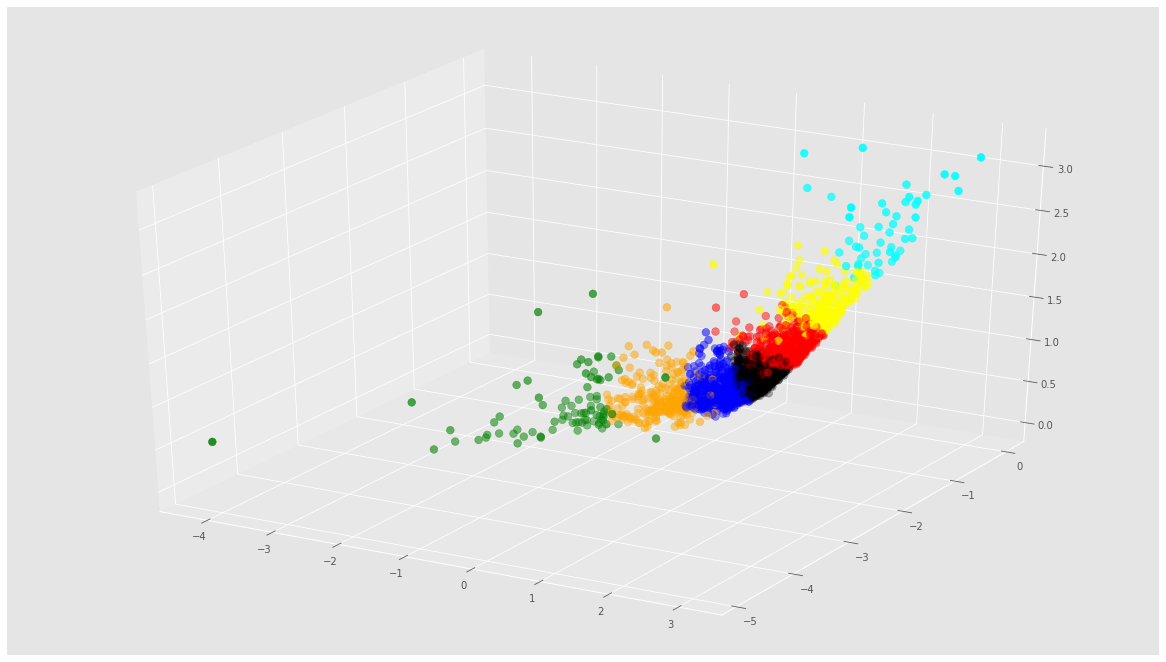

In [135]:
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','orange','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter( prueba[prueba.columns[2]],prueba[prueba.columns[1]],prueba[prueba.columns[0]], c=asignar,s=60)


### Gráficar velas de grupos

In [144]:
velas=cop[cop.columns[:4]]
velas["grupos"]=labels

In [170]:
grupo5=velas[velas["grupos"]==6]
grupo5.head()

,OPEN,HIGH,LOW,CLOSE,grupos
16916,2226.0,2234.85,2219.10,2224.35,6
16923,2249.0,2259.80,2240.05,2246.20,6
16929,2283.0,2293.00,2271.00,2288.60,6
16943,2503.2,2519.00,2493.65,2498.50,6
16947,2585.0,2600.00,2578.60,2582.00,6


In [171]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(
                open=grupo5['OPEN'], high=grupo5['HIGH'],
                low=grupo5['LOW'], close=grupo5['CLOSE'])
                     ])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()